In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# importing graphing library for graphical analysis
    import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

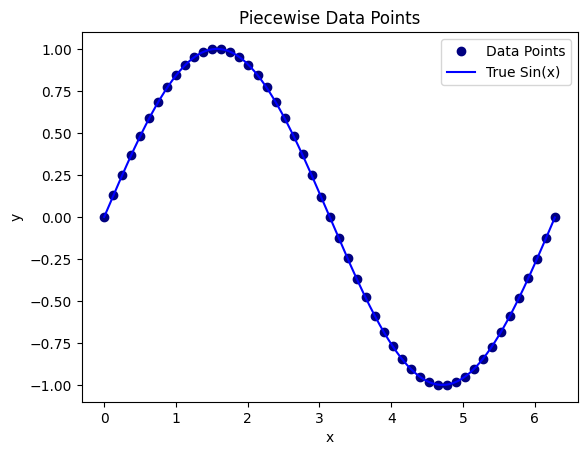

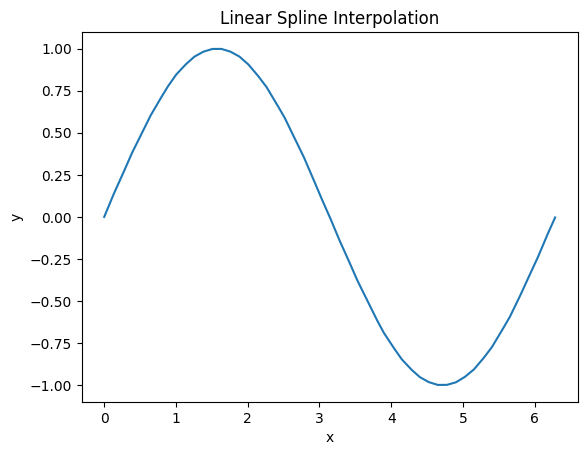

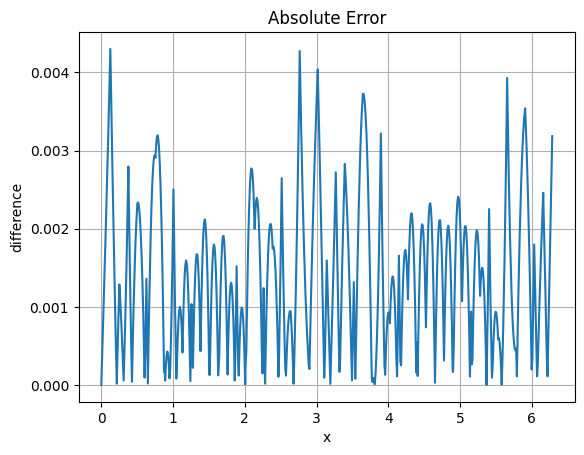

Max Error: 0.0043009090553906 at x= 0.12566370614359174


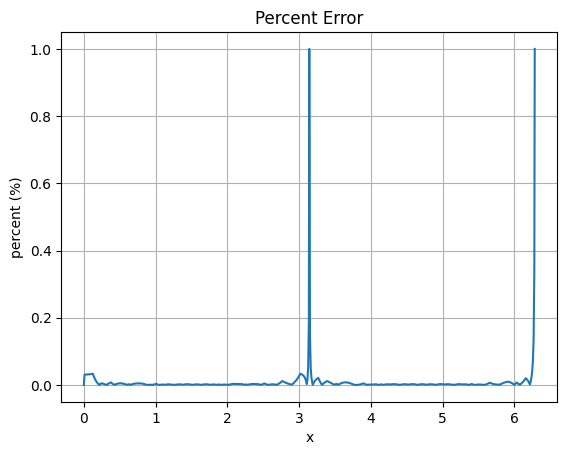

Max Error: 1.0000000000002018 % at x= 3.1415926535897936


In [2]:
scaling = 1E-2

x = np.arange(0, 2*np.pi, scaling)
sin = np.sin(x)

# function that will break-up original sin(x) function into a broader array of data points
# generating piecewise functions for approximation in next function
# note that more pieces (piecewise functions) yield a higher degree of accuracy once spline function occurs

def piecewise(x, y, pieces):
    temp = (2*np.pi)/pieces
    xp = np.arange(0, 2*np.pi + temp, temp)
    yp = np.array([])
    for i in range(pieces+1):
        idx = np.argmin(np.abs(x - xp[i]))
        yp = np.append(yp, y[idx])
    return xp, yp

xp, yp = piecewise(x, sin, 50)

# plotting datapoints only from piecewise function
# comparing with true sin(x) function
plt.plot(xp, yp, linestyle = "none", marker = "o", color = "navy")
plt.plot(x, sin, color = "blue")
plt.legend(["Data Points", "True Sin(x)"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Piecewise Data Points")
plt.show()


# function of linear splines approximation
# combination of piecewise linear functions

def linsplines(x, y, scaling):
    
    xnew = np.array([])
    ynew = np.array([])
    
    for i in range(len(x) - 1):
        # Generate new x-values between x[i] and x[i+1]
        xtemp = np.arange(x[i], x[i+1], scaling)
        
        # Interpolate corresponding y-values
        ytemp = y[i] + (xtemp - x[i]) * ((y[i+1] - y[i]) / (x[i+1] - x[i]))
        
        # Append to interpolation values
        xnew = np.append(xnew, xtemp)
        ynew = np.append(ynew, ytemp)

    # Add the final endpoint to make sure it’s included
    xnew = np.append(xnew, x[-1])
    ynew = np.append(ynew, y[-1])
    
    return xnew, ynew

# getting pieced together approximation of sin(x) for linear splines function
xs, ys = linsplines(xp, yp, scaling)

# plotting approximated linear spline function for sin(x)
plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Spline Interpolation")
plt.show()

def sinerror(xs, ys):
    true = np.sin(xs)
    temp = np.abs(true - ys)
    abserror=temp
    pererror = np.array([])
    for i in range(len(xs)):
        if ys[i] == 0:
            pererror = np.append(pererror, 0)
        else:
            pererror = np.append(pererror, np.abs(temp[i]/ys[i]))

    return abserror, pererror

# obtaining errors from error function
abserror, pererror = sinerror(xs, ys)

# plotting errors...

def error(x, abserror, pererror):
    plt.plot(x, abserror)
    plt.xlabel("x")
    plt.ylabel("difference")
    plt.title("Absolute Error")
    plt.grid()
    plt.show()
    print("Max Error:", np.max(abserror), "at x=", x[np.argmax(abserror)])

    plt.plot(x, pererror)
    plt.xlabel("x")
    plt.ylabel("percent (%)")
    plt.title("Percent Error")
    plt.grid()
    plt.show()
    print("Max Error:", np.max(pererror), "% at x=", x[np.argmax(pererror)])

error(xs, abserror, pererror)

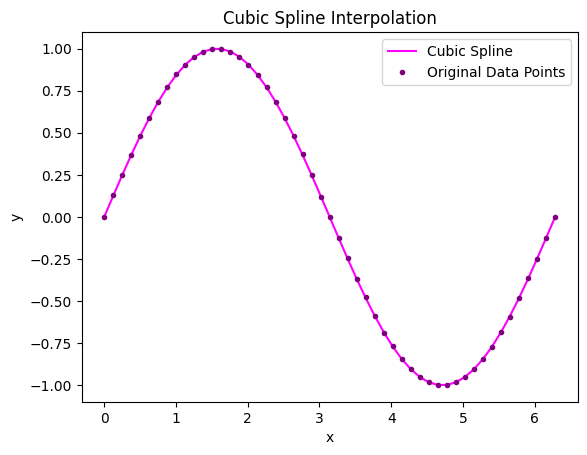

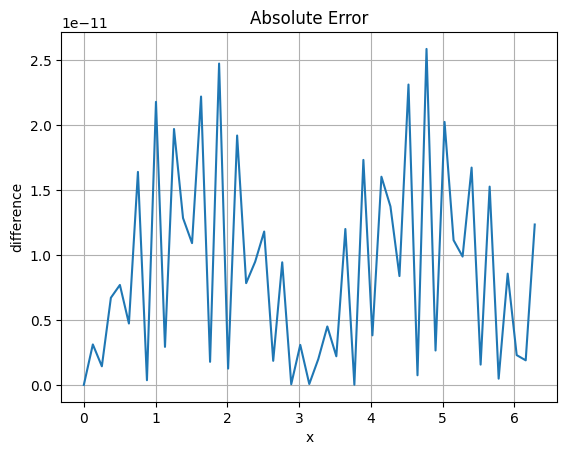

Max Error: 2.5890289911956188e-11 at x= 4.775220833456486


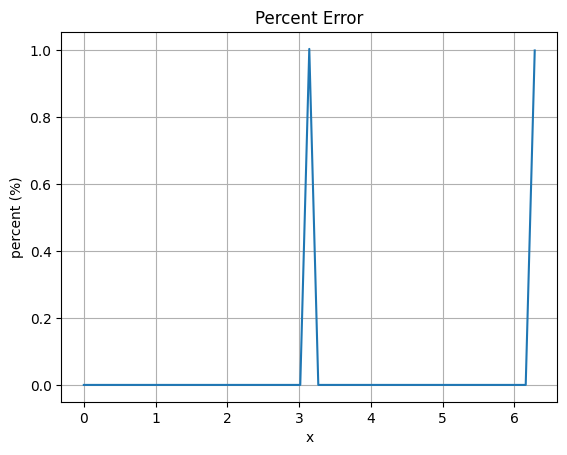

Max Error: 1.0045468077468571 % at x= 3.1415926535897936


In [3]:
# implementing cubic spline built in function
# using piecewise functions from earlier (specificall x array)

from scipy.interpolate import CubicSpline, interp1d

cspline = CubicSpline(x, sin)
ycs = cspline(xp)

# plotting approximated cubic spline function for sin(x)
plt.plot(xp, ycs, color = "magenta")
plt.plot(xp, yp, linestyle = "none", marker = ".", color = "purple")
plt.plot()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Spline Interpolation")
plt.legend(["Cubic Spline", "Original Data Points"])
plt.show()

# obtaining errors from error function
abserror, pererror = sinerror(xp, ycs)

# plotting erros
error(xp, abserror, pererror)